<a href="https://colab.research.google.com/github/realtechz/Tensorflow_zero_to_mastery/blob/main/01_TF_regression/01_NN_regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#01_TF_regression/

# Introduction to Regression with Neural Networks in Tensorflow

There are many defintions for a regression problem but in our case, we are going to simplify it: Predicting a numercial variable base on some other combination of variables , even shorter.. predicting a number.

In [2]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit 

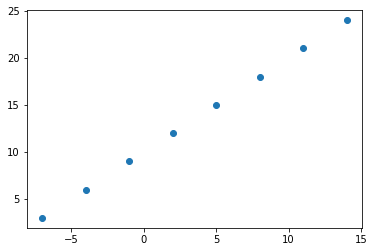

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y= np.array([3.0, 6.0, 9.0, 12.0,15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes


In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

 in simple words we are going to use 1 x to predict 1 y


In [10]:
#Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

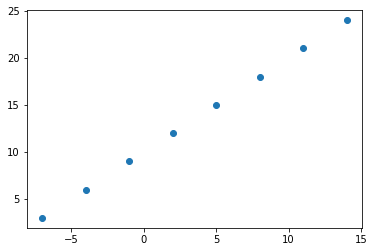

In [12]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hiddem layers of a deep learning mode.
2. **Compiling a model** - define the loss function( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns) and evaluation metrics( what we can use to interpret the performance of our model).
3.**Fitting a model** - letting the model try to find patterns between X and Y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [
                             tf.keras.layers.Dense(1)
    ])

# 2. compilethe model
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mae is short for mean absolute error)

# 3. Fit the model
model.fit(X, y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 1s 669ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

we can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might can add more layers, increase the number of hidden units
( also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling the model**- here we might change the optimization function or prehaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** ( leave it training for longer ) or on more data.

In [17]:
# Lets rebuild our model
tf.random.set_seed(42)
# 1. create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model (this time we will train it for longer)
model.fit(X, y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 215ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 99

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Lets see if our model's prediction has improved
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [30]:
# lets see what we can do to improve it futher

# 1. create the model ( this time with an extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation = "relu"),
                            tf.keras.layers.Dense(1)
])

# 2 . compiling the model 
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 255ms/step - loss: 14.1372 - mae: 14.1372
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.5698 - mae: 13.5698
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0048 - mae: 13.0048
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.4368 - mae: 12.4368
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.8608 - mae: 11.8608
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2935 - mae: 11.2935
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7074 - mae: 10.7074
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0981 - mae: 10.0981
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4610 - mae: 9.4610
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7979 - mae: 8.7979
Epoch 11/100
1/1 [==============================] - 0s 3ms/st

In [31]:
model.predict([17.0])

array([[32.351814]], dtype=float32)

In [38]:
# lets see what we can do to improve it futher

# 1. create the model ( this time with an extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation = None),
                            tf.keras.layers.Dense(1)
])

# 2 . compiling the model 
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 301ms/step - loss: 14.6943 - mae: 14.6943
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9952 - mae: 13.9952
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.3017 - mae: 13.3017
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6121 - mae: 12.6121
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9240 - mae: 11.9240
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2345 - mae: 11.2345
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5401 - mae: 10.5401
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8381 - mae: 9.8381
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1255 - mae: 9.1255
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.3998 - mae: 8.3998
Epoch 11/100
1/1 [==============================] - 0s 3ms/step

In [39]:
model.predict([17.0])

array([[27.414919]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural network is:

build the model -> fit it -> evaluate it and start again

when it comes to evaluation ... there are 3 words you should memorize:

 > "Visualize, visualize, visualize"

Its a good idea to visualize:
* the data - what data are we working with? what does it look like?
* the model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* the predictions of the model - how do he predictions of a model lin eup against the ground truth ( the original labels) ?


In [40]:
# make a bigger dataset
X = tf.range( -100, 100 , 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [42]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

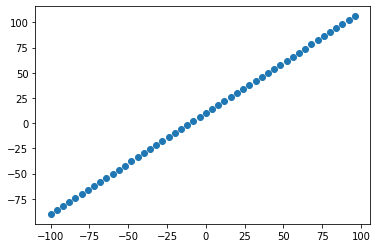

In [44]:
plt.scatter(X,y)

### The 3 sets... 

* **train set**- 70-80% of the data
* **Validation set** - 10-15% of the data
* **test set** - 10-15 % of the data

In [45]:
len(X)

50

In [78]:
# split the data into train and test sets 
X_train = X[:40]
y_train = X[:40]

X_test = X[40:]
y_test= y[40:]

In [79]:
len(X_train), len(X_test)

(40, 10)

### Visualizing the data

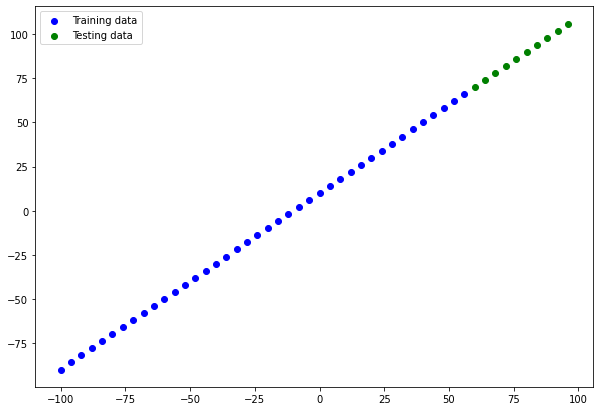

In [116]:
X = tf.range( -100, 100 , 4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test= y[40:]

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

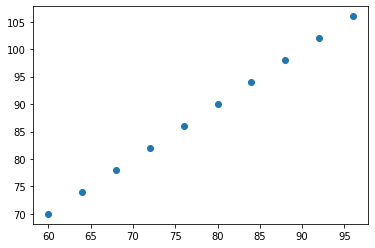

In [105]:
plt.scatter(X_test,y_test)

In [117]:
# lets see what we can do to improve it futher

# 1. create the model ( this time with an extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

# 2 . compiling the model 
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. fitting the model
#model.fit(X_train, y_train, epochs = 100)

### visualizing a model

In [84]:
#model.summary()
#will get a error if the model is not run at least once or inputshape is not given

In [131]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(10 , input_shape = [1], name = "Inpur_layer"),
                            tf.keras.layers.Dense(1, name = "Output_layer")
                            
], name = "my_model")

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])
model.fit(X_train,y_train, verbose = 0,epochs = 100)

In [132]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inpur_layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total no of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns)
the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you use parameters from other models during **transfer learning**)


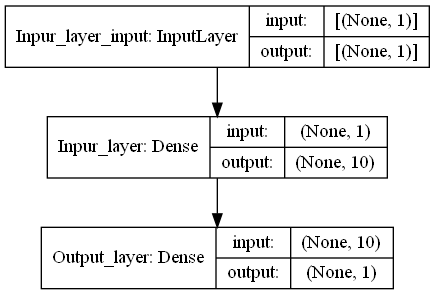

In [133]:
from tensorflow.keras.utils import plot_model

plot_model(model= model, show_shapes= True)

### Visulizing our models predictions

To visualize predictions , its a good idea to plot them against the ground truth labels.
often you will see this in the form of y_test or y_true versus the y_pred 

In [134]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [135]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [136]:
# lets create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth 
  """
  plt.figure(figsize= (10,7))
  # Plot the training data in blue 
  plt.scatter(train_data, train_labels, c ="b", label = "training data")
  # Plot the testing data in green 
  plt.scatter(test_data, test_labels, c ="g", label = "testing data")
  # Plot models predictions in red
  plt.scatter(test_data,predictions, c = "r", label = "predictions")
  plt.legend();


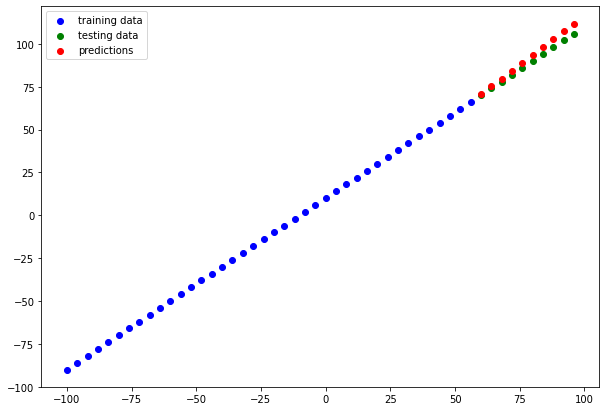

In [137]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluating our models prediction with regression evaluation metrics